# Import Libraries and Load Data

In [196]:
#Import libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA

#Display maximum columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 60)

#URL to churn dataset
url = 'https://raw.githubusercontent.com/bethdfuller/D206_clean/main/churn_raw_data.csv'

#Read churn dataset
churndf = pd.read_csv(url, index_col='CaseOrder')

# Exploration

In [197]:
churndf.shape

(10000, 51)

In [198]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education          

In [199]:
churndf.head(20)

,Unnamed: 0,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4


## Drop Duplicate Unnamed Column

In [200]:
#Drop unnamed column (duplicate of CaseOrder)
churndf = churndf.drop(columns='Unnamed: 0')

In [201]:
churndf.head(20)

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4


In [202]:
unique_data = churndf.nunique()
print(unique_data)

Customer_id             10000
Interaction             10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8655
Population               5933
Area                        3
Timezone                   25
Job                       639
Children                   11
Age                        72
Education                  12
Employment                  5
Income                   7506
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9993
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

# Format

## Standard Python Names

In [203]:
python_columns = ["customer_id", "uid", "city", "state", "county", "zip_code",
                  "latitude", "longitude", "population", "area", "timezone", "job", "children", "age",
                  "education", "employment", "income", "marital_status", "gender", "churn", "outage_sec_perweek",
                  "email", "contacts", "yearly_equip_failure", "techie", "contract", "port_modem",
                  "tablet", "internet_service", "phone_service", "multiple_lines", "online_security",
                  "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies",
                  "paperless_billing", "payment_method", "tenure", "monthly_charge", "bandwidth_gb_year",
                  "survey1_response", "survey2_fixes", "survey3_replacements", "survey4_reliability", "survey5_options",
                  "survey6_respectful", "survey7_courteous", "survey8_listening"]

churndf.set_axis(python_columns, axis=1, inplace=True)

<ipython-input-203-140e9e4addad>:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  churndf.set_axis(python_columns, axis=1, inplace=True)


## Zip

In [204]:
churndf['zip_code']=churndf['zip_code'].astype("str").str.zfill(5)

In [205]:
print(churndf['zip_code'])

CaseOrder
1        99927
2        48661
3        97148
4        92014
5        77461
         ...  
9996     05758
9997     37042
9998     79061
9999     30117
10000    30523
Name: zip_code, Length: 10000, dtype: object


## Change columns to category
* Area
* Timezone
* Education
* Employment
* Marital
* Gender
* Contract
* Internet Service
* Payment Method



In [206]:
churndf['area']=churndf['area'].astype('category')
churndf['marital_status']=churndf['marital_status'].astype('category')
churndf['gender']=churndf['gender'].astype('category')
churndf['contract']=churndf['contract'].astype('category')
churndf['internet_service']=churndf['internet_service'].astype('category')
churndf['payment_method']=churndf['payment_method'].astype('category')

In [207]:
category_columns = churndf.select_dtypes(include=['category']).columns

for column in category_columns:
  print(f"Column: {column}")
  print(churndf[column].unique())
  print()

Column: area
['Urban', 'Suburban', 'Rural']
Categories (3, object): ['Rural', 'Suburban', 'Urban']

Column: marital_status
['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced']
Categories (5, object): ['Divorced', 'Married', 'Never Married', 'Separated', 'Widowed']

Column: gender
['Male', 'Female', 'Prefer not to answer']
Categories (3, object): ['Female', 'Male', 'Prefer not to answer']

Column: contract
['One year', 'Month-to-month', 'Two Year']
Categories (3, object): ['Month-to-month', 'One year', 'Two Year']

Column: internet_service
['Fiber Optic', 'DSL', 'None']
Categories (3, object): ['DSL', 'Fiber Optic', 'None']

Column: payment_method
['Credit Card (automatic)', 'Bank Transfer(automatic)', 'Mailed Check', 'Electronic Check']
Categories (4, object): ['Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check',
                         'Mailed Check']



In [208]:
churndf.timezone.value_counts()

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: timezone, dtype: in

## Change Timezone to Category and Merge Categories

In [209]:
churndf['timezone']=churndf['timezone'].astype('category')

In [210]:
churndf.timezone.replace({
    #Atlantic
    "America/Puerto_Rico": "atlantic",

    #Eastern
    "America/New_York": "eastern",
    "America/Detroit": "eastern",
    "America/Indiana/Indianapolis": "eastern",
    "America/Kentucky/Louisville": "eastern",
    "America/Indiana/Vincennes": "eastern",
    "America/Toronto": "eastern",
    "America/Indiana/Petersburg": "eastern",
    "America/Indiana/Winamac": "eastern",
    "America/Indiana/Marengo": "eastern",

    #Central
    "America/Chicago": "central",
    "America/Menominee": "central",
    "America/Indiana/Tell_City": "central",
    "America/North_Dakota/New_Salem": "central",
    "America/Ojinaga": "central",
    "America/Indiana/Knox": "central",

    #Mountain
    "America/Denver": "mountain",
    "America/Boise": "mountain",

    #Arizona - Mountain/No Daylight Savings
    "America/Phoenix": "arizona",

    #Pacific
    "America/Los_Angeles": "pacific",

    #Alaska
    "America/Anchorage": "alaska",
    "America/Nome": "alaska",
    "America/Sitka": "alaska",
    "America/Juneau": "alaska",

    #Hawaii-Aleutian
    "Pacific/Honolulu": "hawaii_aleutian",

}, inplace=True)

In [211]:
churndf.timezone.value_counts()

eastern            4550
central            3698
pacific             887
mountain            609
arizona             104
alaska               77
atlantic             40
hawaii_aleutian      35
Name: timezone, dtype: int64

## Education to Ordered Categorical

In [212]:
churndf.education.value_counts()

Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: education, dtype: int64

In [213]:
churndf['education'] = pd.Categorical(churndf['education'], categories=["No Schooling Completed", "Nursery School to 8th Grade",
                                        "9th Grade to 12th Grade, No Diploma",
                                        "GED or Alternative Credential", "Regular High School Diploma", "Some College, Less than 1 Year",
                                        "Some College, 1 or More Years, No Degree", "Professional School Degree", "Associate's Degree",
                                        "Bachelor's Degree", "Master's Degree", "Doctorate Degree"], ordered=True)

In [214]:
education_counts = churndf.education.value_counts().sort_index()
print(education_counts)

No Schooling Completed                       118
Nursery School to 8th Grade                  449
9th Grade to 12th Grade, No Diploma          870
GED or Alternative Credential                387
Regular High School Diploma                 2421
Some College, Less than 1 Year               652
Some College, 1 or More Years, No Degree    1562
Professional School Degree                   198
Associate's Degree                           760
Bachelor's Degree                           1703
Master's Degree                              764
Doctorate Degree                             116
Name: education, dtype: int64


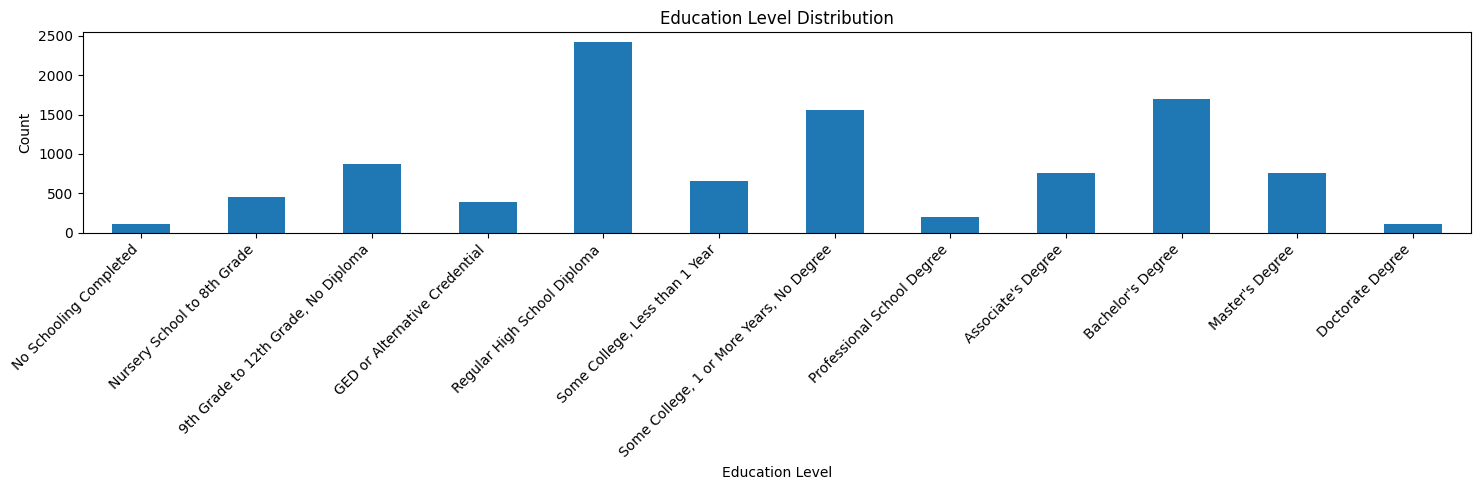

In [215]:
plt.figure(figsize=(15, 5))
education_counts.plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Employment to Ordered Categorical

In [216]:
churndf['employment'] = pd.Categorical(churndf['employment'], categories=["Unemployed", "Student", "Retired", "Part Time", "Full Time"], ordered=True)

In [217]:
employment_counts = churndf.employment.value_counts().sort_index()
print(employment_counts)

Unemployed     991
Student        964
Retired       1011
Part Time     1042
Full Time     5992
Name: employment, dtype: int64


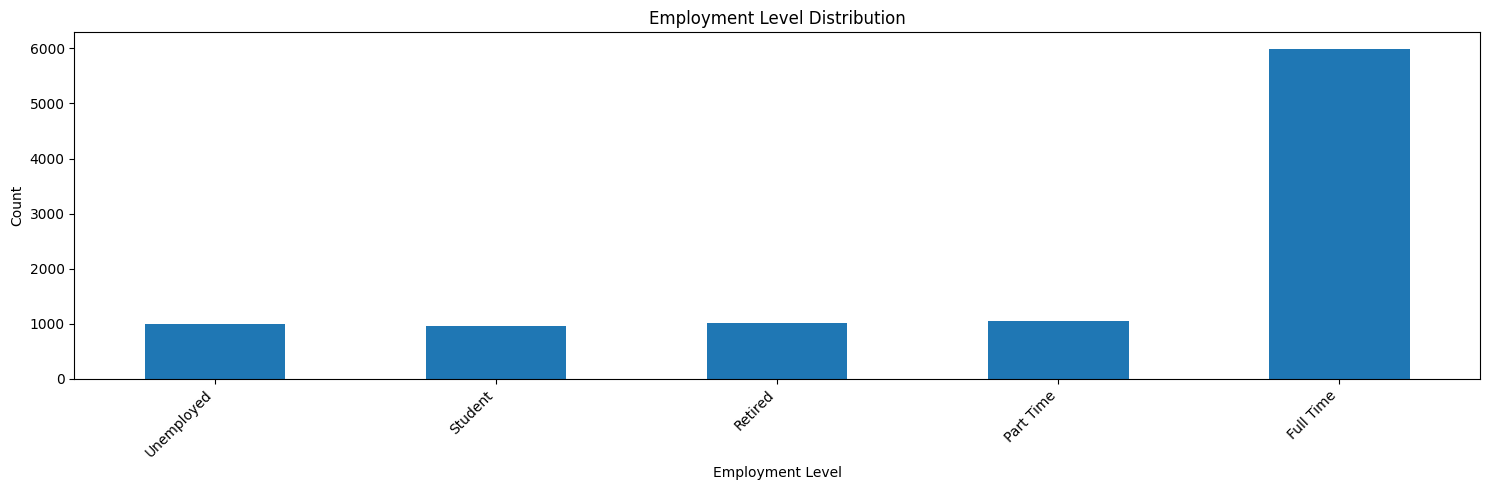

In [218]:
plt.figure(figsize=(15, 5))
employment_counts.plot(kind='bar')
plt.title('Employment Level Distribution')
plt.xlabel('Employment Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Numerical View

In [219]:
churndf.describe()

,latitude,longitude,population,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,survey1_response,survey2_fixes,survey3_replacements,survey4_reliability,survey5_options,survey6_respectful,survey7_courteous,survey8_listening
count,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


## Population Inquiries

In [220]:
count_population_0 = (churndf['population']==0).sum()
print(count_population_0)

97


In [221]:
cities_population_0 = churndf[churndf['population'] == 0]['city']
print(cities_population_0)

CaseOrder
14      East Livermore
423             Warren
429            Bayside
435            Memphis
447           Caroleen
             ...      
9217           Memphis
9442          New York
9658        Oak Island
9703           Vidalia
9945              Rome
Name: city, Length: 97, dtype: object


# Duplicates

In [222]:
churndf.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [223]:
print(churndf.duplicated().value_counts())

False    10000
dtype: int64


# Missing Values

In [224]:
churndf.isnull().sum()

customer_id                0
uid                        0
city                       0
state                      0
county                     0
zip_code                   0
latitude                   0
longitude                  0
population                 0
area                       0
timezone                   0
job                        0
children                2495
age                     2475
education                  0
employment                 0
income                  2490
marital_status             0
gender                     0
churn                      0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  2477
contract                   0
port_modem                 0
tablet                     0
internet_service           0
phone_service           1026
multiple_lines             0
online_security            0
online_backup              0
device_protection          0
tech_support  

<Axes: ylabel='CaseOrder'>

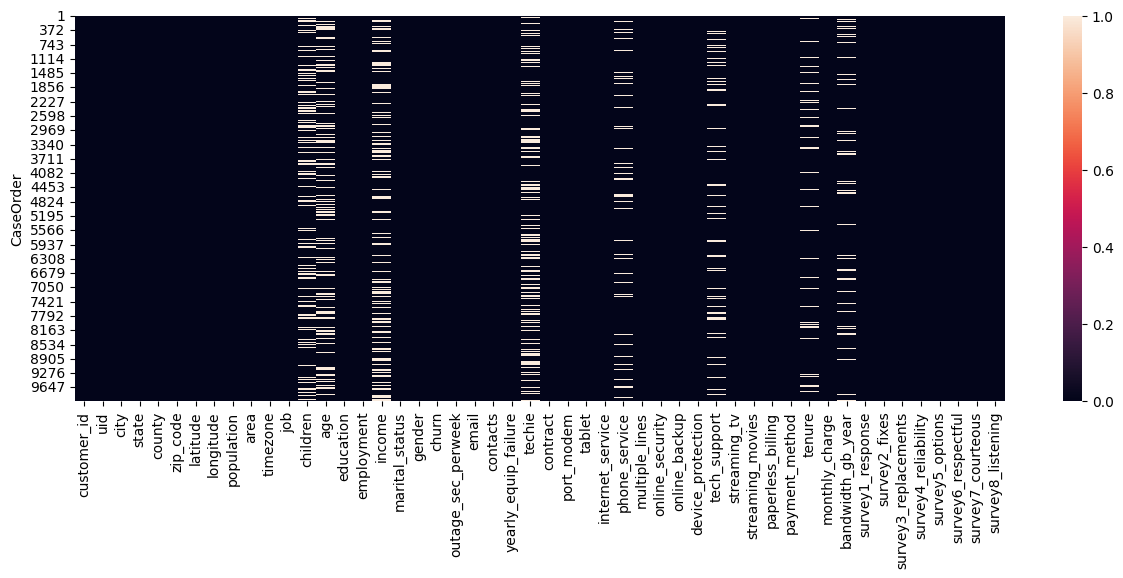

In [225]:
plt.figure(figsize=(15,5))
sns.heatmap(churndf.isnull())

## Children - Random

In [226]:
churndf.children.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: children
Non-Null Count  Dtype  
--------------  -----  
7505 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB


In [227]:
churndf.children.value_counts(normalize=True)

0.0     0.255696
1.0     0.249700
2.0     0.146569
3.0     0.146036
4.0     0.102465
5.0     0.021452
8.0     0.021053
7.0     0.019853
6.0     0.017988
10.0    0.009860
9.0     0.009327
Name: children, dtype: float64

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

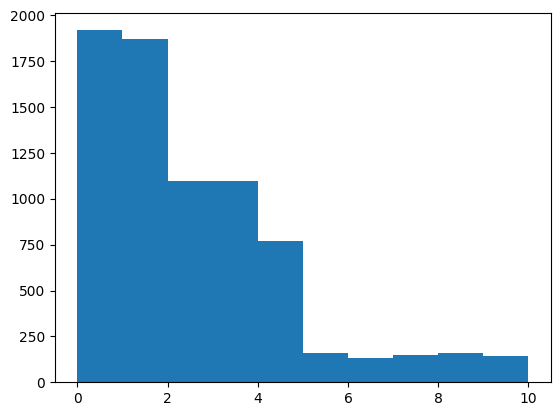

In [228]:
plt.hist(churndf['children'])

In [229]:
churndf['children'].median()

1.0

Randomly assign 0 or 1 children to the missing values in the children column.

In [230]:
churndf.loc[churndf['children'].isna(), 'children'] = np.random.choice([0,1], len(churndf.loc[churndf['children'].isna(), 'children']))

## Age - Random

In [231]:
churndf.age.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: age
Non-Null Count  Dtype  
--------------  -----  
7525 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB


In [232]:
churndf.age.value_counts()

55.0    128
41.0    122
77.0    121
80.0    120
57.0    120
       ... 
59.0     92
78.0     92
87.0     92
18.0     90
47.0     87
Name: age, Length: 72, dtype: int64

(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

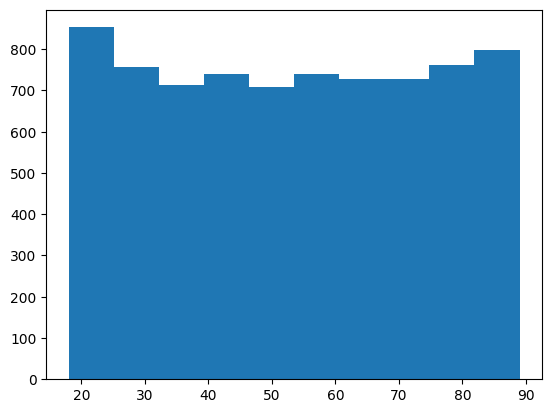

In [233]:
plt.hist(churndf['age'])

In [234]:
churndf['age'].describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: age, dtype: float64

Randomly assign age from 18-89

In [235]:
random_age = np.arange(start=18, stop=89)
churndf.loc[churndf.age.isna(), 'age'] = np.random.choice(random_age, len(churndf.loc[churndf.age.isna(), 'age']))

## Income - Median

In [236]:
churndf.income.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: income
Non-Null Count  Dtype  
--------------  -----  
7510 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB


In [237]:
churndf.income.value_counts()

61325.92    2
36461.20    2
25598.66    2
10530.09    2
28561.99    1
           ..
23947.08    1
25781.26    1
28955.02    1
57295.46    1
16667.58    1
Name: income, Length: 7506, dtype: int64

(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

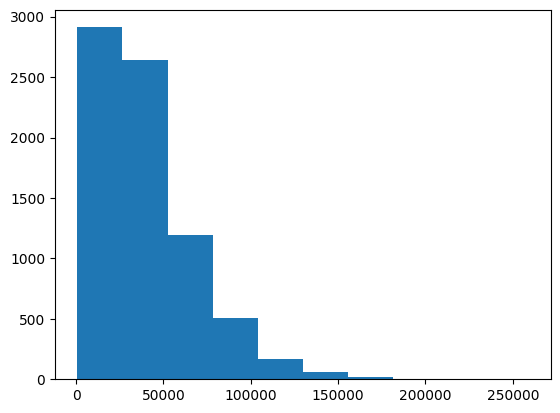

In [238]:
plt.hist(churndf['income'])

In [239]:
churndf['income'].describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: income, dtype: float64

Assign median income to missing incomes

In [240]:
churndf.loc[churndf['income'].isna(), 'income'] = churndf['income'].median()

## Technie - Y/N

In [241]:
churndf.techie.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: techie
Non-Null Count  Dtype 
--------------  ----- 
7523 non-null   object
dtypes: object(1)
memory usage: 156.2+ KB


In [242]:
churndf.techie.value_counts(normalize=True)

No     0.832912
Yes    0.167088
Name: techie, dtype: float64

In [243]:
churndf.loc[churndf['techie'].isna(), 'techie'] = np.random.choice(['Yes', 'No'], len(churndf.loc[churndf['techie'].isna(), 'techie']))

(array([7499.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2501.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

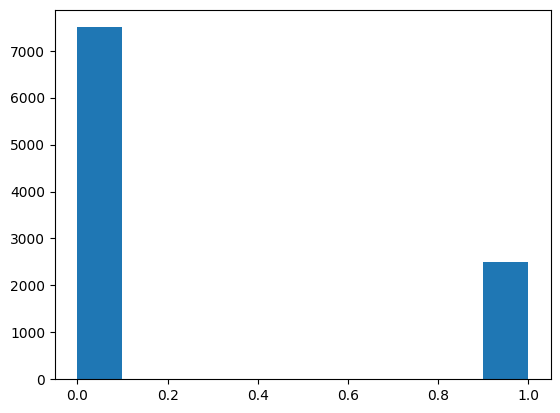

In [244]:
mapping_dict = {'No': 0, 'Yes': 1}
churndf['techie'] = churndf['techie'].replace(mapping_dict)
plt.hist(churndf['techie'])

## Phone - Y/N

In [245]:
churndf.phone_service.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: phone_service
Non-Null Count  Dtype 
--------------  ----- 
8974 non-null   object
dtypes: object(1)
memory usage: 156.2+ KB


In [246]:
churndf.phone_service.value_counts(normalize=1)

Yes    0.905728
No     0.094272
Name: phone_service, dtype: float64

In [247]:
churndf.loc[churndf['phone_service'].isna(), 'phone_service'] = np.random.choice(['Yes', 'No'], len(churndf.loc[churndf['phone_service'].isna(), 'phone_service']))

(array([1348.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8652.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

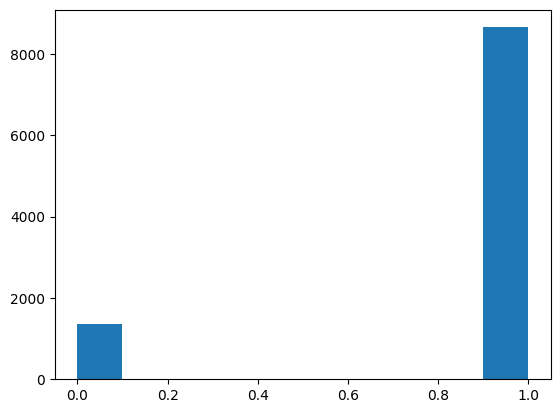

In [248]:
mapping_dict = {'No': 0, 'Yes': 1}
churndf['phone_service'] = churndf['phone_service'].replace(mapping_dict)
plt.hist(churndf['phone_service'])

## TechSupport - Y/N

In [249]:
churndf.tech_support.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: tech_support
Non-Null Count  Dtype 
--------------  ----- 
9009 non-null   object
dtypes: object(1)
memory usage: 156.2+ KB


In [250]:
churndf.tech_support.value_counts(normalize=1)

No     0.625486
Yes    0.374514
Name: tech_support, dtype: float64

In [251]:
churndf.loc[churndf['tech_support'].isna(), 'tech_support'] = np.random.choice(['Yes', 'No'], len(churndf.loc[churndf['tech_support'].isna(), 'tech_support']))

(array([6143.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3857.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

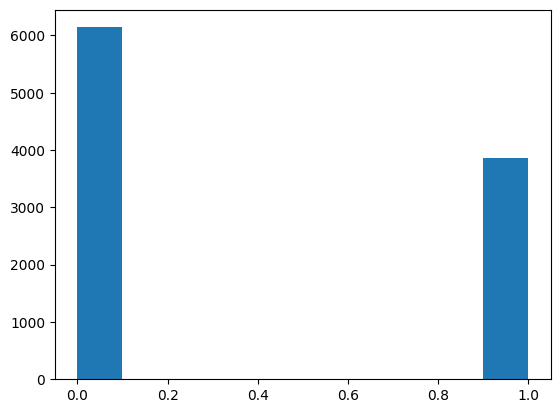

In [252]:
mapping_dict = {'No': 0, 'Yes': 1}
churndf['tech_support'] = churndf['tech_support'].replace(mapping_dict)
plt.hist(churndf['tech_support'])

## Tenure - Median


In [253]:
churndf.tenure.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: tenure
Non-Null Count  Dtype  
--------------  -----  
9069 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB


In [254]:
churndf.tenure.describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: tenure, dtype: float64

In [255]:
churndf.loc[churndf['tenure'].isna(), 'tenure'] = churndf['tenure'].median()

## Bandwidth GB Year - Median

In [256]:
churndf.bandwidth_gb_year.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 1 to 10000
Series name: bandwidth_gb_year
Non-Null Count  Dtype  
--------------  -----  
8979 non-null   float64
dtypes: float64(1)
memory usage: 156.2 KB


In [257]:
churndf.bandwidth_gb_year.describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: bandwidth_gb_year, dtype: float64

In [258]:
churndf.loc[churndf['bandwidth_gb_year'].isna(), 'bandwidth_gb_year'] = churndf['bandwidth_gb_year'].median()

# Outliers

## Population **

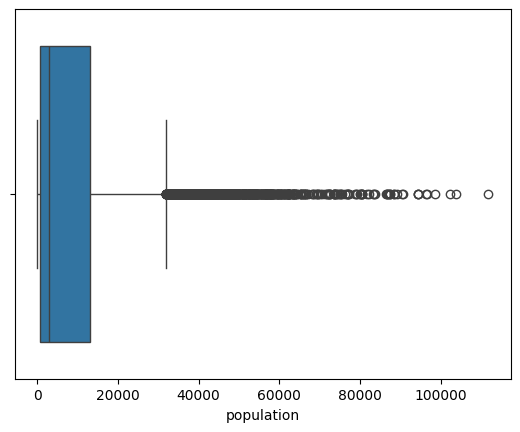

In [259]:
boxplot=sns.boxplot(x='population', data=churndf)

## Children *


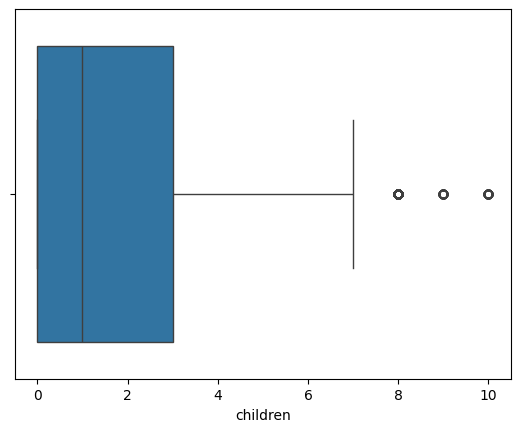

In [ ]:
boxplot=sns.boxplot(x='children', data=churndf)

In [ ]:
count_more_than_6_children = (churndf['children'] > 7).sum()
print("Count of people with more than 6 children:", count_more_than_6_children)

## Age

In [ ]:
boxplot=sns.boxplot(x='age', data=churndf)

## Income *

In [ ]:
boxplot=sns.boxplot(x='income', data=churndf)

In [ ]:
high_income_individuals = churndf[churndf['income'] > 250000]
high_income_individuals.head()

## Outage_sec_perweek *

In [ ]:
boxplot=sns.boxplot(x='outage_sec_perweek', data=churndf)

In [ ]:
churndf.outage_sec_perweek.describe()

In [ ]:
count_below_zero = (churndf['outage_sec_perweek'] < 0).sum()
print("Count of values below zero in 'outage_sec_perweek':", count_below_zero)

In [ ]:
churndf.loc[churndf['outage_sec_perweek'] < 0, 'outage_sec_perweek'] = 0

## Email *

In [ ]:
boxplot=sns.boxplot(x='email', data=churndf)

In [ ]:
churndf.email.describe()

## Contacts *

In [ ]:
boxplot=sns.boxplot(x='contacts', data=churndf)

In [ ]:
churndf.contacts.describe()

## Yearly_equip_failure *

In [ ]:
boxplot=sns.boxplot(x='yearly_equip_failure', data=churndf)

In [ ]:
churndf.yearly_equip_failure.describe()

## Tenure

In [ ]:
boxplot=sns.boxplot(x='tenure', data=churndf)

## Monthly Charge *

In [ ]:
boxplot=sns.boxplot(x='monthly_charge', data=churndf)

In [ ]:
churndf.monthly_charge.describe()

In [ ]:
monthly_charge_above_300 = churndf[churndf['monthly_charge'] > 300]
monthly_charge_above_300.head()

## Bandwidth_GB_Year

In [ ]:
boxplot=sns.boxplot(x='bandwidth_gb_year', data=churndf)

# PCA

In [ ]:
churndf.describe()

In [ ]:
# Select numeric columns
pca_data = churndf[['population', 'children', 'age', 'income', 'outage_sec_perweek',
                         'email', 'contacts', 'yearly_equip_failure', 'techie', 'phone_service', 'tech_support',
                         'tenure', 'monthly_charge', 'bandwidth_gb_year', 'survey1_response', 'survey2_fixes',
                         'survey3_replacements', 'survey4_reliability', 'survey5_options', 'survey6_respectful',
                         'survey7_courteous', 'survey8_listening']]

# Normalize data
pca_data_normalized = (pca_data - pca_data.mean()) / pca_data.std()

# PCA .shape[1] extracts all components or use (n_components=#) for specific #
pca = PCA(n_components=pca_data.shape[1])

# new data set variables - components
pca.fit(pca_data_normalized)
transform_pca = pd.DataFrame(pca.transform(pca_data_normalized), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10',
                                                                      'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18','PC19',
                                                                      'PC20', 'PC21', 'PC22'])

## Explained Variance / Number of Components

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

## Eigenvalues vs. Number of Components

In [ ]:
# Compute the covariance matrix
cov_matrix = np.dot(pca_data_normalized.T, pca_data_normalized) / pca_data.shape[0]

# Compute eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plot eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color="red")
plt.show()


In [ ]:
# Create a DataFrame with column names and eigenvalues
eigen_df = pd.DataFrame({'Column': pca_data_normalized.columns, 'Eigenvalue': eigenvalues})

# Sort the DataFrame by eigenvalues in descending order
eigen_df_sorted = eigen_df.sort_values(by='Eigenvalue', ascending=False)

# Print the sorted DataFrame
print("Column Names and Eigenvalues (Ordered by Highest Eigenvalue):")
print(eigen_df_sorted)


In [ ]:
# Compute loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10',
                                                                      'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18','PC19',
                                                                      'PC20', 'PC21', 'PC22'], index=pca_data_normalized.columns)

# Print the transformed data and loadings
print("Transformed Data:")
print(transform_pca)
print("\nLoadings:")
print(loadings)

# Extract CSV File

In [ ]:
churndf.to_csv('churndf_clean.csv', index=False)

# Random Data Proof

## Young Doctorates

In [ ]:
# Filter rows where 'education' is equal to 'Doctorate Degree'
doctorate_df = churndf[churndf['education'] == 'Doctorate Degree']

# Create a new DataFrame with 'education' and 'age' columns from the filtered DataFrame
doctorate_education_age_df = doctorate_df[['education', 'age']]

# Sort the DataFrame by the 'age' column in ascending order
sorted_doctorate_education_age_df = doctorate_education_age_df.sort_values(by='age')

# Display the sorted DataFrame
sorted_doctorate_education_age_df.head(30)

## Young Retirees

In [ ]:
# Filter rows where 'employment' is equal to 'Retired'
retired_df = churndf[churndf['employment'] == 'Retired']

# Create a new DataFrame with 'employment' and 'age' columns from the filtered DataFrame
retired_age_df = retired_df[['employment', 'age']]

# Sort the DataFrame by the 'age' column in ascending order
sorted_retired_age_df = retired_age_df.sort_values(by='age')

# Display the sorted DataFrame
print(sorted_retired_age_df.head(30))


## Incorrect City Data

In [ ]:
# Group the data by 'city' and calculate the sum of population size for each city
city_population = churndf.groupby('city')['population'].sum().reset_index()

# Sort the cities based on total population size in descending order
sorted_city_population = city_population.sort_values(by='population', ascending=False)

# Create a new DataFrame with sorted cities and their corresponding total population size
sorted_city_population_df = pd.DataFrame(sorted_city_population)

# Display the sorted DataFrame
sorted_city_population_df.head(25)